# Data Science in Telco: Data Cleansing
## Latar Belakang
DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience-nya sehingga tidak akan ditinggalkan pelanggan.

Walaupun baru berumur 1 tahun lebih sedikit, DQLab Telco sudah mempunyai banyak pelanggan yang beralih langganan ke kompetitor. Pihak management ingin mengurangi jumlah pelanggan yang beralih (churn) dengan menggunakan machine learning.

Oleh karena itu, tim Data Scientist diminta untuk mempersiapkan data sekaligus membuat model prediksi yang tepat untuk menentukan pelanggan akan berhenti berlangganan (churn) atau tidak.

Tugas dan Langkah
Sebagai seorang data scientist, kamu diminta untuk menyiapkan data sebelum dilakukan permodelan.

Pada tugas kali ini, kamu akan melakukan Data Preprocessing (Data Cleansing) bulan lalu, yakni Juni 2020.

## Langkah yang akan dilakukan adalah,

1. Mencari ID pelanggan (Nomor telepon) yang valid
2. Mengatasi data-data yang masih kosong (Missing Values)
3. Mengatasi Nilai-Nilai Pencilan (Outlier) dari setiap Variable
4. Menstandardisasi Nilai dari Variable

## Library yang Digunakan
Pada analisis kali ini, akan digunakan beberapa package yang membantu kita dalam melakukan analisis data.

1. Pandas

Pandas (Python for Data Analysis) adalah library Python yang fokus untuk proses analisis data seperti manipulasi data, persiapan data, dan pembersihan data.

- read_csv() digunakan untuk membaca file csv
- str.match() digunakan untuk mencocokan dengan karakter tertentu
- drop() digunakan untuk menghapus
- count() digunakan untuk menghitung masing-masing variable
- drop_duplicates() digunakan untuk menghapus data duplicate rows
- fillna() digunakan untuk mengisi dengan nilai tertentu
- quantile() digunakan untuk melihat quantile ke tertentu
- mask() mengganti nilai tertentu jika kondisi memenuhi
- astype() mengubah tipe data
- value_counts() digunakan untuk menghitung unik dari kolom
- sort_values() digunakan untuk sort values
- isnull() digunakan untuk mendeteksi missing values
- dropna() digunakan untuk menghapus missing values
- replace() digunakan untuk mengganti nilai
2. Matplotlib

Matplotlib adalah library Python yang fokus pada visualisasi data seperti membuat plot grafik. Matplotlib dapat digunakan dalam skrip Python, Python dan IPython shell, server aplikasi web, dan beberapa toolkit graphical user interface (GUI) lainnya.

- figure() digunakan untuk membuat figure gambar baru
3. Seaborn

Seaborn membangun di atas Matplotlib dan memperkenalkan tipe plot tambahan. Ini juga membuat plot Matplotlib tradisional Anda terlihat sedikit lebih cantik.

- box_plot() digunakan untuk membuat box plot

## Data yang Digunakan
Untuk dataset yang digunakan sudah disediakan dalam format csv, silahkan baca melalui fungsi pandas di python df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')


Untuk detail datanya adalah sebagai berikut:

- UpdatedAt Periode of Data taken
- customerID Customer ID
- gender Whether the customer is a male or a female (Male, Female)
- SeniorCitizen Whether the customer is a senior citizen or not (1, 0)
- Partner Whether the customer has a partner or not (Yes, No)
- Dependents Whether the customer has dependents or not (Yes, No)
- tenure Number of months the customer has stayed with the company
- PhoneService Whether the customer has a phone service or not (Yes, No)
- MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)
Contract The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges The amount charged to the customer monthly
- TotalCharges The total amount charged to the customer
- Churn Whether the customer churned or not (Yes or No)


### Import Library dan Dataset

In [ ]:
#import library
import pandas as pd
pd.options.display.max_columns = 50

In [ ]:
#import dataset
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

In [ ]:
#Tampilkan jumlah baris dan kolom
print(df_load.shape)


(7113, 22)


In [ ]:
#Tampilkan 5 data teratas
print(df_load.head(5))

   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV S

In [ ]:
#Jumlah ID yang unik
print(df_load.customerID.nunique())

7017


### Memfilter ID Number Pelanggan Format Tertentu

In [ ]:
# Mengubah kolom 'customerID' menjadi string, lalu mencocokkan dengan pola regex:
# Pola '(45\d{9,10})' berarti:
# - Harus diawali dengan angka 45
# - Diikuti oleh 9 atau 10 digit angka (total panjang 11–12 digit)
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')

# Menyaring hanya baris dengan 'valid_id' bernilai True (ID yang sesuai format)
# Lalu menghapus kolom bantu 'valid_id' agar tidak ikut dalam hasil akhir
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis=1)

# Menampilkan jumlah ID Customer yang lolos filter
print('Hasil jumlah ID Customer yang terfilter adalah', df_load['customerID'].count())


Hasil jumlah ID Customer yang terfilter adalah 7006


### Memfilter Duplikasi ID Number Pelanggan

In [ ]:
# Drop Duplicate Rows
df_load.drop_duplicates()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7108,202006,45117219093,Male,0,Yes,Yes,53.0,Yes,Yes,DSL,Yes,Yes,No,No,No,Yes,Two year,No,Bank transfer (automatic),69.70,3686.05,NaN
7109,202006,45564915800,Female,0,No,No,12.0,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,One year,No,Mailed check,95.50,1115.15,NaN
7110,202006,45655964195,Male,0,No,No,26.0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,98.65,2537.00,NaN
7111,202006,45899251814,Male,0,No,No,21.0,Yes,No,DSL,No,No,Yes,No,No,Yes,Month-to-month,No,Mailed check,61.65,1393.60,NaN


In [ ]:
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')
print('Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah',df_load['customerID'].count())

Hasil jumlah ID Customer yang sudah dihilangkan duplikasinya (distinct) adalah 6993


### Kesimpulan
Validitas dari ID Number pelanggan sangat diperlukan untuk memastikan bahwa data yang kita ambil sudah benar. Berdasarkan hasil tersebut, terdapat perbedaan jumlah nomor ID dari data pertama kali di load sampai dengan hasil akhir. Jumlah row data ketika pertama kali di load ada sebanyak 7113 rows dan 22 columns dengan 7017 jumlah ID yang unique. Kemudian setelah di cek validitas dari ID pelanggan, maka tersisa 6993 rows data

### Mengatasi Missing Values dengan Penghapusan Rows

In [ ]:
print('Total missing values data dari kolom churn', df_load['Churn'].isnull().sum())
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'], inplace=True)
print('Total Rows dan kolom Data setelah dihapus data Missing Values adalah', df_load.shape)

Total missing values data dari kolom churn 43
Total Rows dan kolom Data setelah dihapus data Missing Values adalah (6950, 22)


### Mengatasi Missing Values dengan Pengisian Nilai tertentu

In [ ]:
#handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)


/tmp/ipython-input-10-635355435.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_load['tenure'].fillna(11, inplace=True)


In [ ]:
#Loop
#Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
   median=df_load[col_name].median()
df_load[col_name].fillna(median, inplace=True)
print('\nJumlah Missing Values setelah di imputer datanya, adalah:')
print(df_load.isnull().sum().sort_values(ascending=False))


Jumlah Missing Values setelah di imputer datanya, adalah:
MonthlyCharges      26
UpdatedAt            0
gender               0
SeniorCitizen        0
Partner              0
customerID           0
Dependents           0
tenure               0
MultipleLines        0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
InternetService      0
TechSupport          0
StreamingTV          0
Contract             0
StreamingMovies      0
PaperlessBilling     0
PaymentMethod        0
TotalCharges         0
Churn                0
dtype: int64


/tmp/ipython-input-11-4186624355.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_load[col_name].fillna(median, inplace=True)


### Kesimpulan
Setelah di analisis lebih lanjut, ternyata masih ada missing values dari data yang kita sudah validkan Id Number pelanggannya. Missing values terdapat pada kolom Churn, tenure, MonthlyCharges & TotalCharges. Setelah kita tangani dengan cara penghapusan rows dan pengisian rows dengan nilai tertentu, terbukti sudah tidak ada missing values lagi pada data, terbukti dari jumlah missing values masing-masing variable yang bernilai 0. Selanjutnya kita akan melakukan penanganan pencilan (outlier)

### Mendeteksi Adanya Outlier Menggunakan Boxplot

In [ ]:
# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

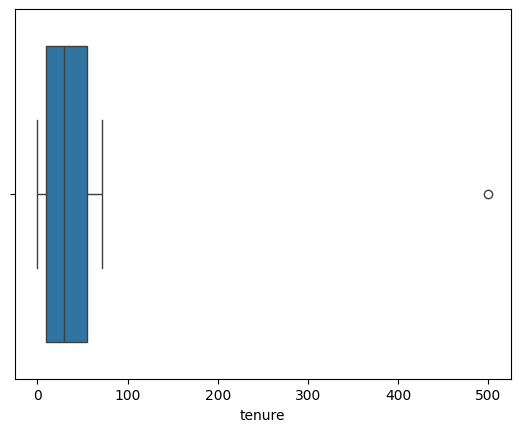

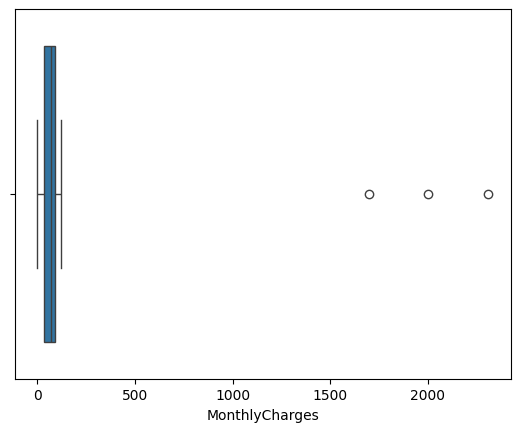

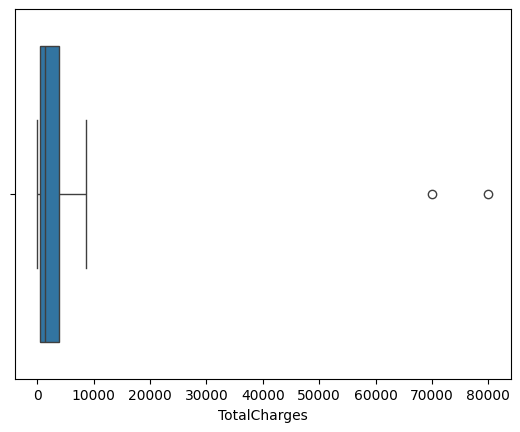

In [ ]:
# Misal untuk kolom tenure
plt.figure()#create the new figure
sns.boxplot(x=df_load['tenure'])#x-axis use the tenure data
plt.show()#for showing/to display the plot
plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()
plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

### Mengatasi Outlier

In [ ]:
# Hitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
Q1 = df_load[['tenure','MonthlyCharges','TotalCharges']].quantile(0.25)
Q3 = df_load[['tenure','MonthlyCharges','TotalCharges']].quantile(0.75)

In [ ]:
# Hitung IQR (Interquartile Range)
IQR = Q3 - Q1

In [ ]:
# Tentukan batas maksimum yang ditolerir (Q3 + 1.5 * IQR)
maximum = Q3 + (1.5 * IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)

Nilai Maximum dari masing-masing Variable adalah: 
tenure             124.00000
MonthlyCharges     170.61875
TotalCharges      8889.13125
dtype: float64


In [ ]:
# Tentukan batas minimum yang ditolerir (Q1 - 1.5 * IQR)
minimum = Q1 - (1.5 * IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)


Nilai Minimum dari masing-masing Variable adalah: 
tenure             -60.00000
MonthlyCharges     -44.63125
TotalCharges     -4682.31875
dtype: float64


# Kesimpulan
Dari ketiga boxplot dengan variable 'tenure','MonthlyCharges' & 'TotalCharges' terlihat jelas bahwasannya ada outlier. Hal ini bisa di identifikasi dari adanya titik-titik yang berada jauh dari gambar boxplot-nya. Kemudian kalau kita liat persebaran datanya dari kolom max nya juga ada nilai yang sangat tinggi sekali.

Kemudian nilai outlier tersebut ditangani dengan cara merubah nilainya ke nilai maximum & minimum dari interquartile range (IQR). Setelah di tangani outlier-nya, dan dilihat perseberan datanya, terlihat sudah tidak ada lagi nilai yang outlier.

### Mendeteksi Nilai yang tidak Standar

In [ ]:
# Menampilkan jumlah nilai unik dari setiap kolom kategorik
for col_name in list([
    'gender','SeniorCitizen','Partner','Dependents','PhoneService',
    'MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
    'DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
    'Contract','PaperlessBilling','PaymentMethod','Churn'
]):
    print('\nUnique Values Count Before Standardized Variable', col_name)
    print(df_load[col_name].value_counts())


Unique Values Count Before Standardized Variable gender
gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: count, dtype: int64

Unique Values Count Before Standardized Variable SeniorCitizen
SeniorCitizen
0    5822
1    1128
Name: count, dtype: int64

Unique Values Count Before Standardized Variable Partner
Partner
No     3591
Yes    3359
Name: count, dtype: int64

Unique Values Count Before Standardized Variable Dependents
Dependents
No     4870
Yes    2060
Iya      20
Name: count, dtype: int64

Unique Values Count Before Standardized Variable PhoneService
PhoneService
Yes    6281
No      669
Name: count, dtype: int64

Unique Values Count Before Standardized Variable MultipleLines
MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: count, dtype: int64

Unique Values Count Before Standardized Variable InternetService
InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: count, dtyp

In [ ]:
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

for col_name in list(['gender','Dependents','Churn']):
	print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable', col_name)
	print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
gender
Male      3505
Female    3445
Name: count, dtype: int64

Unique Values Count After Standardized Variable Dependents
Dependents
No     4870
Yes    2080
Name: count, dtype: int64

Unique Values Count After Standardized Variable Churn
Churn
No     5114
Yes    1836
Name: count, dtype: int64


### Kesimpulan
Ketika kita amati lebih jauh dari jumlah unique value dari masing-masing variable kategorik, terlihat jelas bahwa ada beberapa variable yang tidak standar. Variable itu adalah:

Gender (Female, Male, Wanita, Laki-Laki), yang bisa di standardkan nilainya menjadi (Female, Male) karena mempunyai makna yang sama.
Dependents (Yes, No, Iya), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
Churn (Yes, No, Churn), yang bisa di standardkan nilainya menjadi (Yes, No) karena mempunyai makna yang sama.
Setelah kita standardkan nilainya, dan kita amati kembali bentuk datanya, sudah terstandar dengan baik untuk unique value-nya.